## A Whole Load Of DSP Examples

### A selection of useful URLs:

 - [Online $\LaTeX$ Editor](https://latex.codecogs.com/eqneditor/editor.php)
 - [Online Markdown Editor](https://dillinger.io/)
 - [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)
 - [ASCII Flow - for drawing text diagrams](https://asciiflow.com/#/)

Copyright © 2022 John Edwards


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control
import math
import cmath


In [25]:
# Messing around with the roots of a quadratic equation

a = 1.
b = -2.5
c = 1.
print (f'Roots: of {a}x\u00b2 + {b}x + {c}:')
print (f'x1 = {(-b + (math.sqrt((b*b)-4.*a*c))) / 2*a}')
print (f'x2 = {(-b - (math.sqrt((b*b)-4.*a*c))) / 2*a}')
print (f'H(z) Numerator/Denominator = (z - {((-b + (math.sqrt((b*b)-4.*a*c))) / 2*a):.2f}).(z - {((-b - (math.sqrt((b*b)-4.*a*c))) / 2*a):.2f})')

print('\nIIR Biquad with conjugate poles at z=.4+j.3 and z=.4-j.3')
p1 = complex(.4, .3)
p2 = complex(.4, -.3)
print (f'H(z) Denominator = (z - {p1}).(z - {p2})')

a = 1.
b = -(p1 + p2)
c = p1 * p2
print (f'H(z) Deniminator: {a}z\u00b2 + {b}z + {c}:')
print (f'Factorized denominator:')
print (f'p1 = {(-b + (cmath.sqrt((b*b)-4.*a*c))) / 2*a:.2f}')
print (f'p2 = {(-b - (cmath.sqrt((b*b)-4.*a*c))) / 2*a:.2f}')
print (f'H(z) Denominator = (z - {((-b + (cmath.sqrt((b*b)-4.*a*c))) / 2*a):.2f}).(z - {((-b - (cmath.sqrt((b*b)-4.*a*c))) / 2*a):.2f})')


Roots: of 1.0x² + -2.5x + 1.0:
x1 = 2.0
x2 = 0.5
H(z) Numerator/Denominator = (z - 2.00).(z - 0.50)

IIR Biquad with conjugate poles at z=.4+j.3 and z=.4-j.3
H(z) Denominator = (z - (0.4+0.3j)).(z - (0.4-0.3j))
H(z) Deniminator: 1.0z² + (-0.8-0j)z + (0.25+0j):
Factorized denominator:
p1 = 0.40+0.30j
p2 = 0.40-0.30j
H(z) Denominator = (z - 0.40+0.30j).(z - 0.40-0.30j)


In [16]:
# Signal Generation - Generating a single cycle sinusoid

x = np.arange(8.)
y = np.cos(x * 2.*np.pi/8.)
print (y*(np.abs(y)>0.001))             # Print and remove rounding errors

x = np.arange(0., 2.*np.pi, 2.*np.pi/8.)
y = np.cos(x)
print (y*(np.abs(y)>0.001))             # Print and remove rounding errors

y = np.sin(x * 2.*np.pi/8.)
print (y*(np.abs(y)>0.001))             # Print and remove rounding errors

x = np.arange(0., 2.*np.pi, 2.*np.pi/8.)
y = np.sin(x)
print (y*(np.abs(y)>0.001))             # Print and remove rounding errors

# Warning : linspace
# Note - linspace() calculates from start to finish so to use it to generate a single cycle sinusoid, make sure the increment is correct
x = np.linspace(0,2*np.pi-(2*np.pi/8),8)
y = np.sin(x)
print (y*(np.abs(y)>0.01))              # Print and remove rounding errors


[ 1.          0.70710678  0.         -0.70710678 -1.         -0.70710678
 -0.          0.70710678]
[ 1.          0.70710678  0.         -0.70710678 -1.         -0.70710678
 -0.          0.70710678]
[ 0.          0.57846879  0.94371921  0.96112326  0.62426595  0.05730986
 -0.53077013 -0.92321304]
[ 0.          0.70710678  1.          0.70710678  0.         -0.70710678
 -1.         -0.70710678]
[ 0.          0.70710678  1.          0.70710678  0.         -0.70710678
 -1.         -0.70710678]


In [17]:
# Single cycle cosine and sine waves

print("Single cycle of cosine wave in real input:")
x = np.array([1., 0.7071, 0., -0.7071, -1., -0.7071, 0., 0.7071])
X = np.fft.fft(x)
print(np.around(X, 2))
print("Single cycle of cosin ewave in imaginary input:")
x = np.array([0.+1.j, 0.+0.7071j, 0.+0.j, 0.+-0.7071j, 0.+-1.j, 0.+-0.7071j, 0.+0.j, 0.+0.7071j])
X = np.fft.fft(x)
print(np.around(X, 2))

print("Single cycle of sine wave in real input:")
x = np.array([0., 0.7071, 1., 0.7071, 0., -0.7071, -1., -0.7071])
X = np.fft.fft(x)
print(np.around(X, 2))
print("Single cycle of sine wave in imaginary input:")
x = np.array([0.+0.j, 0.+0.7071j, 0.+1.j, 0.+0.7071j, 0.+0.j, 0.+-0.7071j, 0.+-1.j, 0.+-0.7071j])
X = np.fft.fft(x)
print(np.around(X, 2))


Single cycle of cosine wave in real input:
[0.+0.j 4.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 4.+0.j]
Single cycle of cosin ewave in imaginary input:
[0.+0.j 0.+4.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+4.j]
Single cycle of sine wave in real input:
[0.+0.j 0.-4.j 0.+0.j 0.+0.j 0.+0.j 0.-0.j 0.+0.j 0.+4.j]
Single cycle of sine wave in imaginary input:
[ 0.+0.j  4.+0.j  0.+0.j -0.+0.j  0.+0.j  0.+0.j  0.+0.j -4.+0.j]


Text(0.5, 1.0, 'fft(sin(x)).imag')

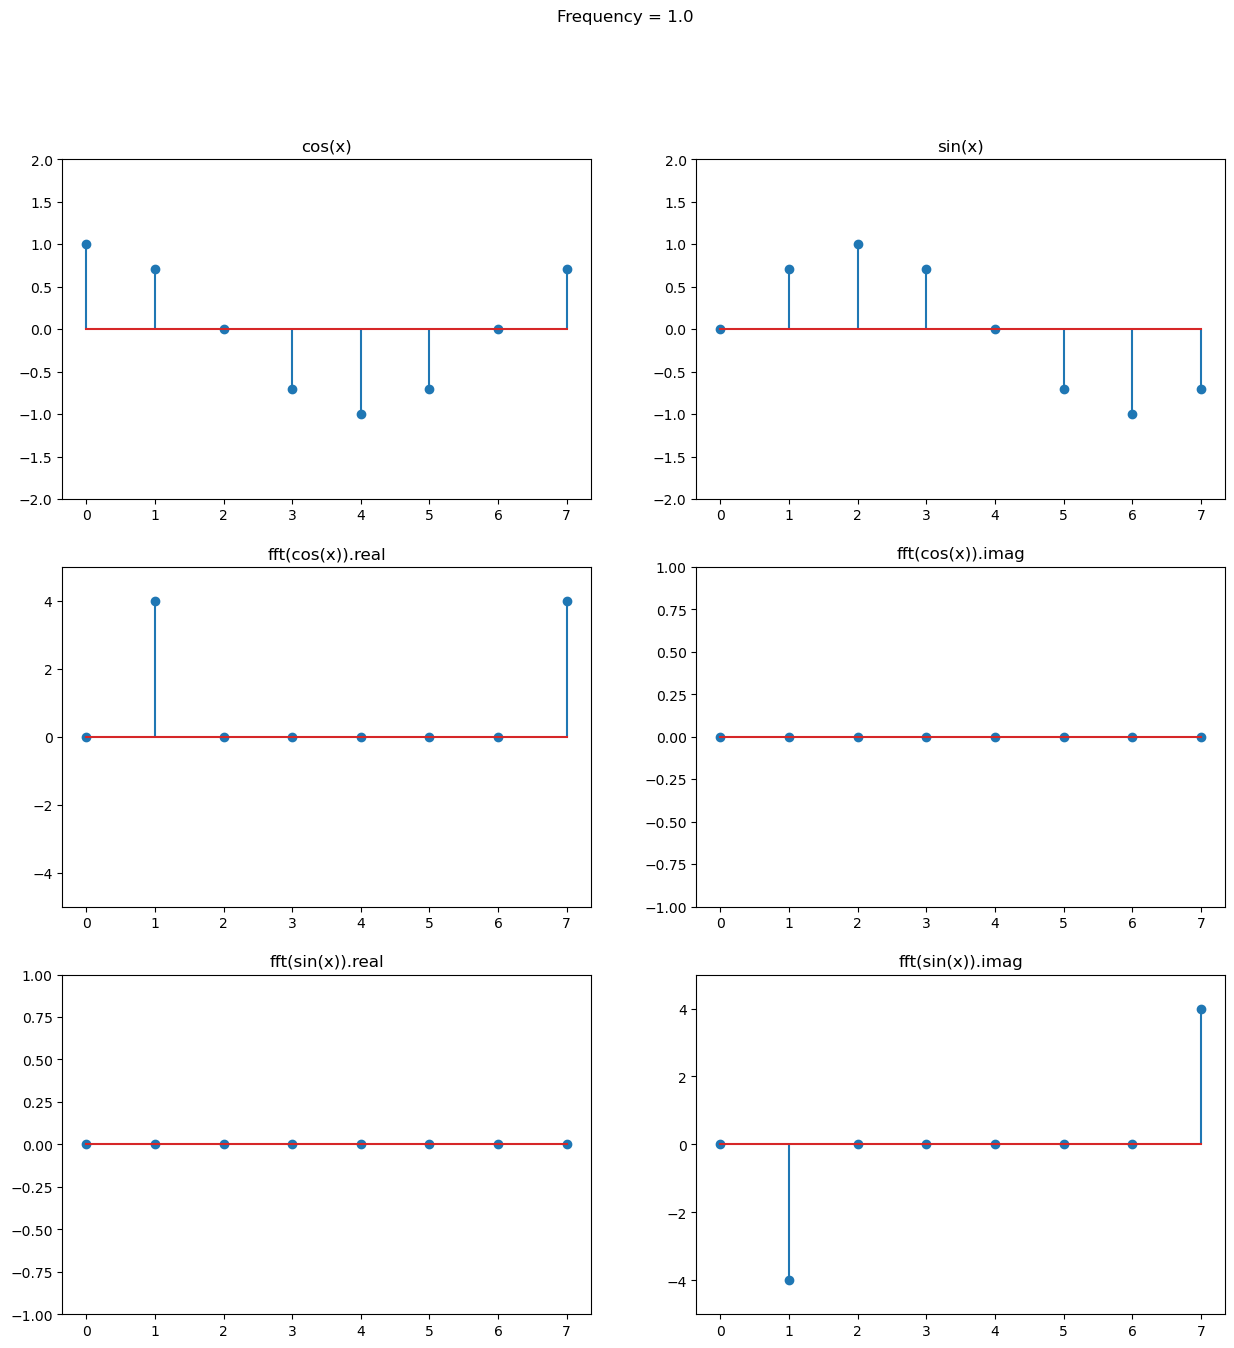

In [18]:
# Time domain and frequency domain plots for single cycle sinusoid
# Can change Freq variable

Freq = 1.                                           # Range : 0 :: 8
FFTSize = 8

plt.figure(figsize=(15, 15))
plt.suptitle('Frequency = ' + str(Freq))

# graph_x=np.arange(8.)
graph_x=np.arange(FFTSize)
c=np.cos(graph_x*Freq*np.pi/(FFTSize/2))
s=np.sin(graph_x*Freq*np.pi/(FFTSize/2))

#xp = np.arange(0., Freq*2.*np.pi, 2.*np.pi/8.)
#np.sin(xp)
#np.cos(xp)

f=np.fft.fft(c)
f.real=f.real*(np.abs(f.real)>0.01)                 # Remove rounding errors
f.imag=f.imag*(np.abs(f.imag)>0.01)                 # Remove rounding errors

plt.subplot(3, 2, 1)
plt.stem(graph_x,c)
plt.ylim(-np.amax(c)-1, np.amax(c)+1)
plt.title('cos(x)')

plt.subplot(3, 2, 2)
plt.stem(graph_x,s)
plt.ylim(-np.amax(s)-1, np.amax(s)+1)
plt.title('sin(x)')

plt.subplot(3, 2, 3)
plt.stem(graph_x,f.real)
plt.ylim(-np.amax(f.real)-1, np.amax(f.real)+1)
plt.title('fft(cos(x)).real')

plt.subplot(3, 2, 4)
plt.stem(graph_x,f.imag)
plt.ylim(-np.amax(f.imag)-1, np.amax(f.imag)+1)
plt.title('fft(cos(x)).imag')

f=np.fft.fft(s)
f.real=f.real*(np.abs(f.real)>0.01)                 # Remove rounding errors
f.imag=f.imag*(np.abs(f.imag)>0.01)

plt.subplot(3, 2, 5)
plt.stem(graph_x,f.real)
plt.ylim(-np.amax(f.real)-1, np.amax(f.real)+1)
plt.title('fft(sin(x)).real')

plt.subplot(3, 2, 6)
plt.stem(graph_x,f.imag)
plt.ylim(-np.amax(f.imag)-1, np.amax(f.imag)+1)
plt.title('fft(sin(x)).imag')


Text(0.5, 1.0, 'fft(sig).imag')

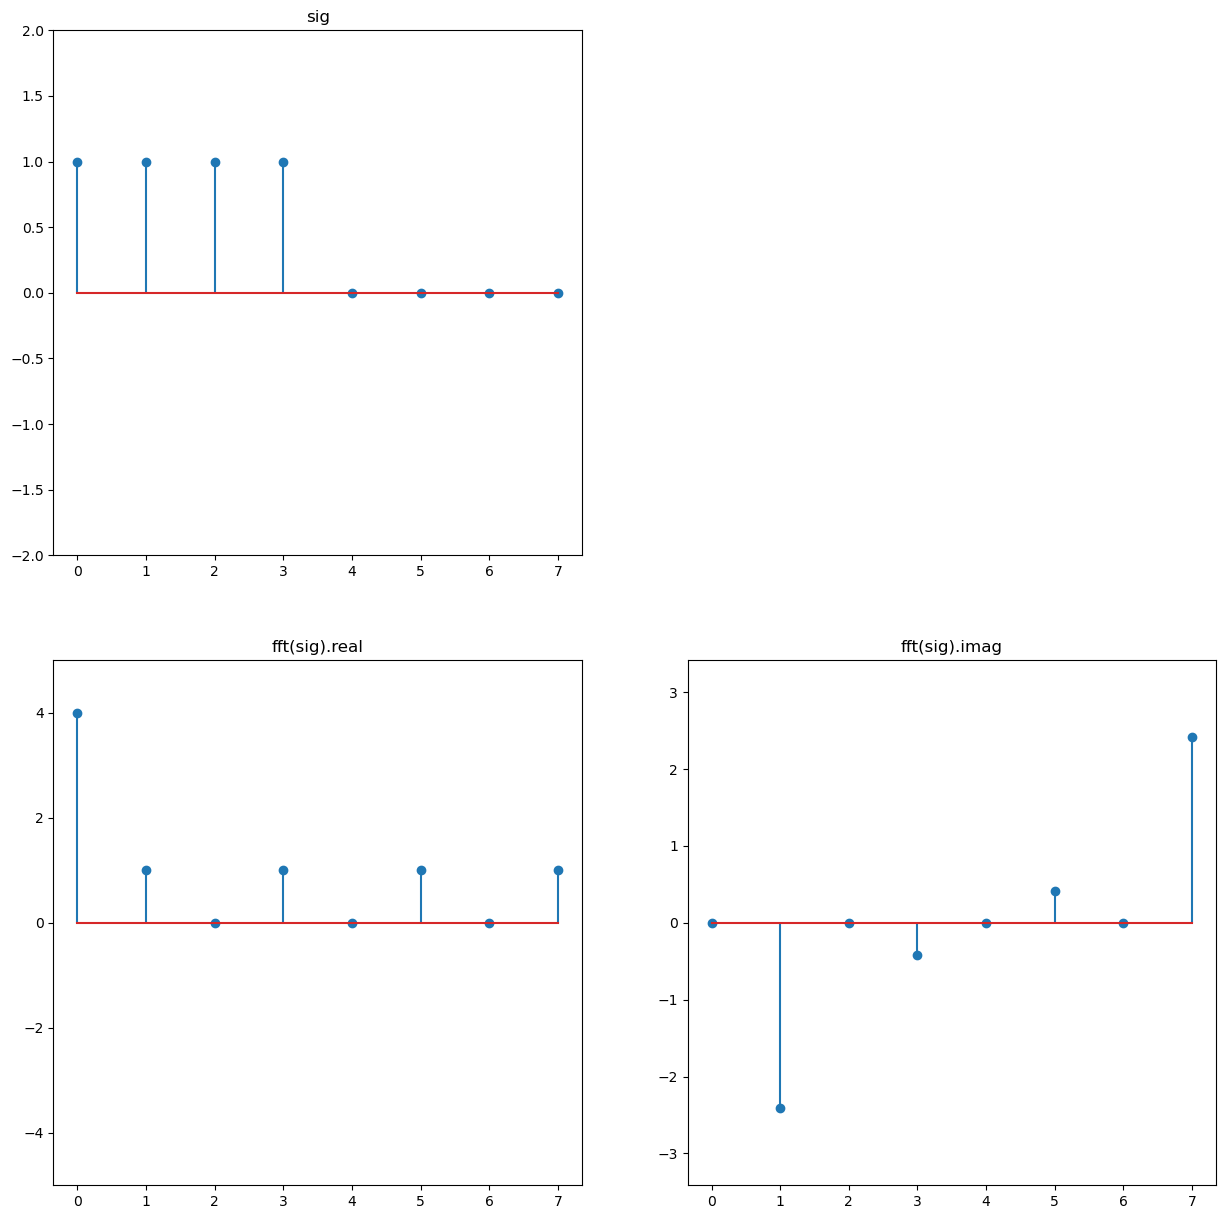

In [19]:
# FFT of a square pulse

FFTSize = 8

sig=np.zeros(FFTSize)
sig[:4] = 1                                         # Select range for pulse

f=np.fft.fft(sig)
f.real=f.real*(np.abs(f.real)>0.01)                 # Remove rounding errors
f.imag=f.imag*(np.abs(f.imag)>0.01)                 # Remove rounding errors

plt.figure(figsize=(15, 15))
graph_x=np.arange(8.)

plt.subplot(2, 2, 1)
plt.stem(graph_x,sig)
plt.ylim(-np.amax(sig)-1, np.amax(sig)+1)
plt.title('sig')

plt.subplot(2, 2, 3)
plt.stem(graph_x,f.real)
plt.ylim(-np.amax(f.real)-1, np.amax(f.real)+1)
plt.title('fft(sig).real')

plt.subplot(2, 2, 4)
plt.stem(graph_x,f.imag)
plt.ylim(-np.amax(f.imag)-1, np.amax(f.imag)+1)
plt.title('fft(sig).imag')



DSP Equations In Latex: https://blog.numerix-dsp.com/2022/11/dsp-equations-in-latex.html

Notes:
VSCode doesn't support equation numbering auto increment and Colab doesn't support "equation*" or "align*" for disabling equation numbers. Colab requires "align" not "align".

Copyright © 2022 John Edwards
